#üìå Extrac√£o

In [8]:
import pandas as pd
import requests
import json


url_dados = 'https://raw.githubusercontent.com/jhonatanwsds/TelecomX_BR/refs/heads/main/TelecomX_Data.json'

try:
    response = requests.get(url_dados)
    response.raise_for_status()
    data = json.loads(response.text)

    dados_clientes = pd.json_normalize(data)

    print("Dados extra√≠dos e organizados com sucesso da forma simples!")
    display(dados_clientes.head())

except Exception as e:
    print(f"Ocorreu um erro: {e}")

Dados extra√≠dos e organizados com sucesso da forma simples!


customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

#üîß Transforma√ß√£o

In [13]:
import pandas as pd
import numpy as np

print("--- Iniciando a Transforma√ß√£o e Limpeza dos Dados ---")

# --- 1. CORRE√á√ÉO DOS DADOS ---

dados_clientes['account.Charges.Total'] = pd.to_numeric(dados_clientes['account.Charges.Total'], errors='coerce')

dados_clientes['Churn'] = dados_clientes['Churn'].replace('', np.nan)

dados_clientes.dropna(inplace=True)

print("\n[PASSO 1] Dados problem√°ticos corrigidos e removidos.")

# --- 2. VERIFICA√á√ÉO FINAL ---

print("\n--- Verifica√ß√£o P√≥s-Limpeza ---")

# Confirma que n√£o h√° mais valores ausentes
print(f"\nValores ausentes restantes: {dados_clientes.isnull().sum().sum()}")

# Confirma que n√£o h√° clientes duplicados
print(f"Clientes duplicados restantes: {dados_clientes['customerID'].duplicated().sum()}")

# Mostra os valores √∫nicos na coluna Churn para provar que o '' sumiu
print(f"Valores √∫nicos em 'Churn' agora: {pd.unique(dados_clientes['Churn'])}")

# Mostra o status final do DataFrame
print("\n--- Estrutura Final dos Dados (Pronto para An√°lise) ---")
dados_clientes.info()

--- Iniciando a Transforma√ß√£o e Limpeza dos Dados ---

[PASSO 1] Dados problem√°ticos corrigidos e removidos.

--- Verifica√ß√£o P√≥s-Limpeza ---

Valores ausentes restantes: 0
Clientes duplicados restantes: 0
Valores √∫nicos em 'Churn' agora: ['No' 'Yes']

--- Estrutura Final dos Dados (Pronto para An√°lise) ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLi

Criando a coluna 'Contas_Diarias'

In [14]:
import pandas as pd

print("--- Criando a coluna 'Contas_Diarias' ---")

dados_clientes['Contas_Diarias'] = dados_clientes['account.Charges.Monthly'] / 30

print("\nColuna 'Contas_Diarias' criada com sucesso. Veja a amostra:")
print(dados_clientes[['customerID', 'account.Charges.Monthly', 'Contas_Diarias']].head())


print("\n--- Estrutura Final dos Dados com a Nova Coluna ---")
dados_clientes.info()

--- Criando a coluna 'Contas_Diarias' ---

Coluna 'Contas_Diarias' criada com sucesso. Veja a amostra:
   customerID  account.Charges.Monthly  Contas_Diarias
0  0002-ORFBO                     65.6        2.186667
1  0003-MKNFE                     59.9        1.996667
2  0004-TLHLJ                     73.9        2.463333
3  0011-IGKFF                     98.0        3.266667
4  0013-EXCHZ                     83.9        2.796667

--- Estrutura Final dos Dados com a Nova Coluna ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Depend

Padroniza√ß√£o

In [15]:
import pandas as pd

print("--- Padronizando e Transformando os Dados ---")

# --- 1. Renomeando as colunas para nomes mais simples ---
print("\nNomes das colunas ANTES da padroniza√ß√£o:")
print(dados_clientes.columns.tolist())

dados_clientes.columns = [col.split('.')[-1] for col in dados_clientes.columns]

print("\nNomes das colunas DEPOIS da padroniza√ß√£o:")
print(dados_clientes.columns.tolist())


# --- 2. Convertendo colunas 'Yes'/'No' para Bin√°rio (1/0) ---
colunas_binarias = [
    'Churn',
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling'
]

mapa_sim_nao = {'Yes': 1, 'No': 0}

for coluna in colunas_binarias:
    dados_clientes[coluna] = dados_clientes[coluna].replace(mapa_sim_nao)

print(f"\nColunas {colunas_binarias} convertidas para 1 e 0.")
print("\nAmostra dos dados ap√≥s a convers√£o:")
print(dados_clientes[colunas_binarias].head())


# --- Verifica√ß√£o Final ---
print("\n--- Estrutura Final dos Dados Ap√≥s Padroniza√ß√£o ---")
dados_clientes.info()

--- Padronizando e Transformando os Dados ---

Nomes das colunas ANTES da padroniza√ß√£o:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias']

Nomes das colunas DEPOIS da padroniza√ß√£o:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total', 'Contas_Diarias']

Colunas ['Churn', 'Partner', 'De

/tmp/ipython-input-15-3049600255.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_clientes[coluna] = dados_clientes[coluna].replace(mapa_sim_nao)


#üìä Carga e an√°lise

In [16]:
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.2f' % x)


print("--- An√°lise Descritiva das Vari√°veis Num√©ricas ---")
display(dados_clientes.describe().T)


print("\n\n--- An√°lise Descritiva das Vari√°veis Categ√≥ricas ---")

display(dados_clientes.describe(include=['object']).T)

--- An√°lise Descritiva das Vari√°veis Num√©ricas ---


count    mean     std   min    25%     50%     75%     max
Churn            7032.00    0.27    0.44  0.00   0.00    0.00    1.00    1.00
SeniorCitizen    7032.00    0.16    0.37  0.00   0.00    0.00    0.00    1.00
Partner          7032.00    0.48    0.50  0.00   0.00    0.00    1.00    1.00
Dependents       7032.00    0.30    0.46  0.00   0.00    0.00    1.00    1.00
tenure           7032.00   32.42   24.55  1.00   9.00   29.00   55.00   72.00
PhoneService     7032.00    0.90    0.30  0.00   1.00    1.00    1.00    1.00
PaperlessBilling 7032.00    0.59    0.49  0.00   0.00    1.00    1.00    1.00
Monthly          7032.00   64.80   30.09 18.25  35.59   70.35   89.86  118.75
Total            7032.00 2283.30 2266.77 18.80 401.45 1397.47 3794.74 8684.80
Contas_Diarias   7032.00    2.16    1.00  0.61   1.19    2.34    3.00    3.96



--- An√°lise Descritiva das Vari√°veis Categ√≥ricas ---


count unique               top  freq
customerID        7032   7032        9995-HOTOH     1
gender            7032      2              Male  3549
MultipleLines     7032      3                No  3385
InternetService   7032      3       Fiber optic  3096
OnlineSecurity    7032      3                No  3497
OnlineBackup      7032      3                No  3087
DeviceProtection  7032      3                No  3094
TechSupport       7032      3                No  3472
StreamingTV       7032      3                No  2809
StreamingMovies   7032      3                No  2781
Contract          7032      3    Month-to-month  3875
PaymentMethod     7032      4  Electronic check  2365

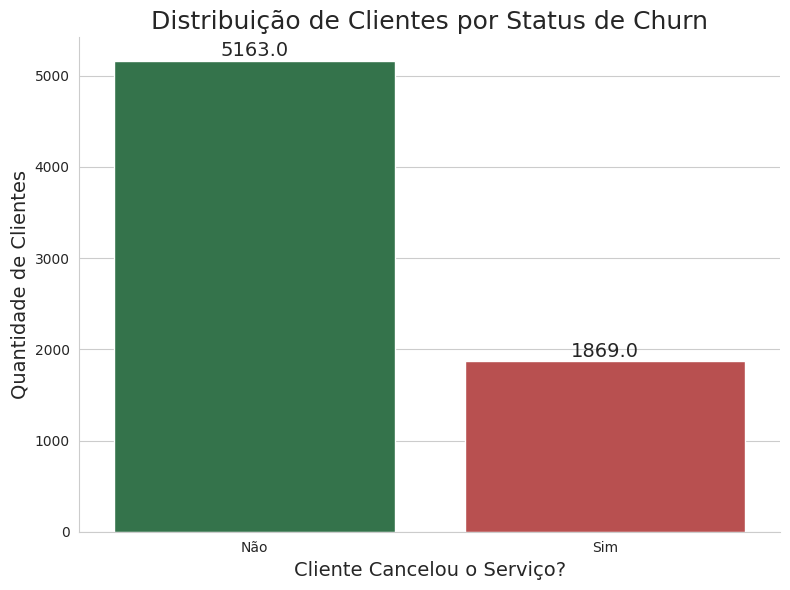

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define o estilo do gr√°fico
sns.set_style('whitegrid')

# Define o tamanho da figura
plt.figure(figsize=(8, 6))


ax = sns.countplot(
    data=dados_clientes,
    x='Churn',
    hue='Churn',
    palette=['#2a7d48', '#c93f3f'],
    legend=False
)

# Adiciona os n√∫meros exatos em cima de cada barra (como antes)
for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        x=patch.get_x() + patch.get_width() / 2,
        y=height + 50,  # Aumentei um pouco o espa√ßo para ficar mais bonito
        s=f'{height}',
        ha='center',
        fontsize=14
    )

# Ajusta os t√≠tulos e os r√≥tulos dos eixos
ax.set_title('Distribui√ß√£o de Clientes por Status de Churn', fontsize=18)
ax.set_xlabel('Cliente Cancelou o Servi√ßo?', fontsize=14)
ax.set_ylabel('Quantidade de Clientes', fontsize=14)

ax.set_xticks([0, 1])
ax.set_xticklabels(['N√£o', 'Sim'])

# Remove as "bordas" de cima e da direita para um visual mais limpo
sns.despine()

# Ajusta o espa√ßamento
plt.tight_layout()

# Exibe o gr√°fico
plt.show()

--- Gr√°fico de Pizza: Propor√ß√£o de Churn ---


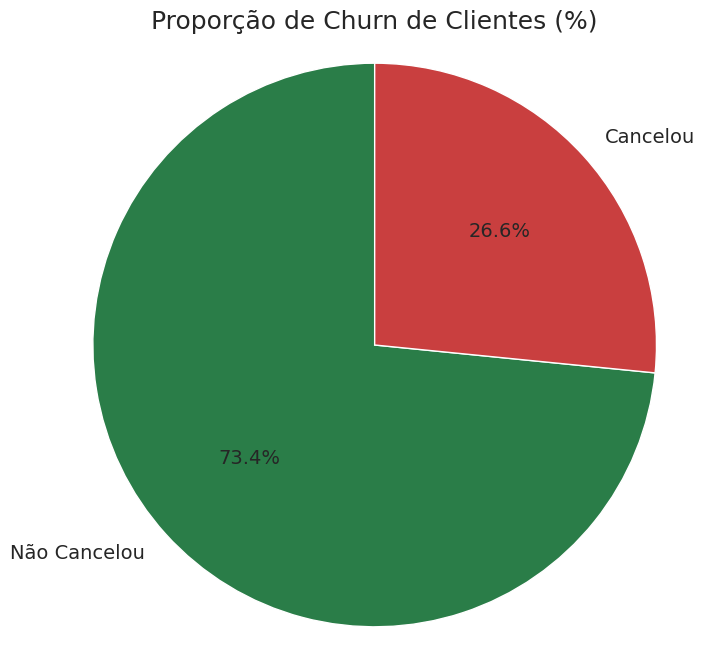

In [21]:
import matplotlib.pyplot as plt

# --- Gr√°fico de Pizza: Propor√ß√£o de Churn (%) ---

print("--- Gr√°fico de Pizza: Propor√ß√£o de Churn ---")

churn_counts = dados_clientes['Churn'].value_counts()

labels = ['N√£o Cancelou', 'Cancelou']

colors = ['#2a7d48', '#c93f3f']

plt.figure(figsize=(8, 8))

# 5. Cria o gr√°fico de pizza

plt.pie(
    churn_counts,
    labels=labels,
    colors=colors,
    autopct='%.1f%%',
    startangle=90,
    textprops={'fontsize': 14}
)

# Adiciona o t√≠tulo do gr√°fico
plt.title('Propor√ß√£o de Churn de Clientes (%)', fontsize=18)

# Garante que o c√≠rculo seja desenhado corretamente
plt.axis('equal')

# Exibe o gr√°fico
plt.show()

An√°lise de Churn por Tipo de Contrato

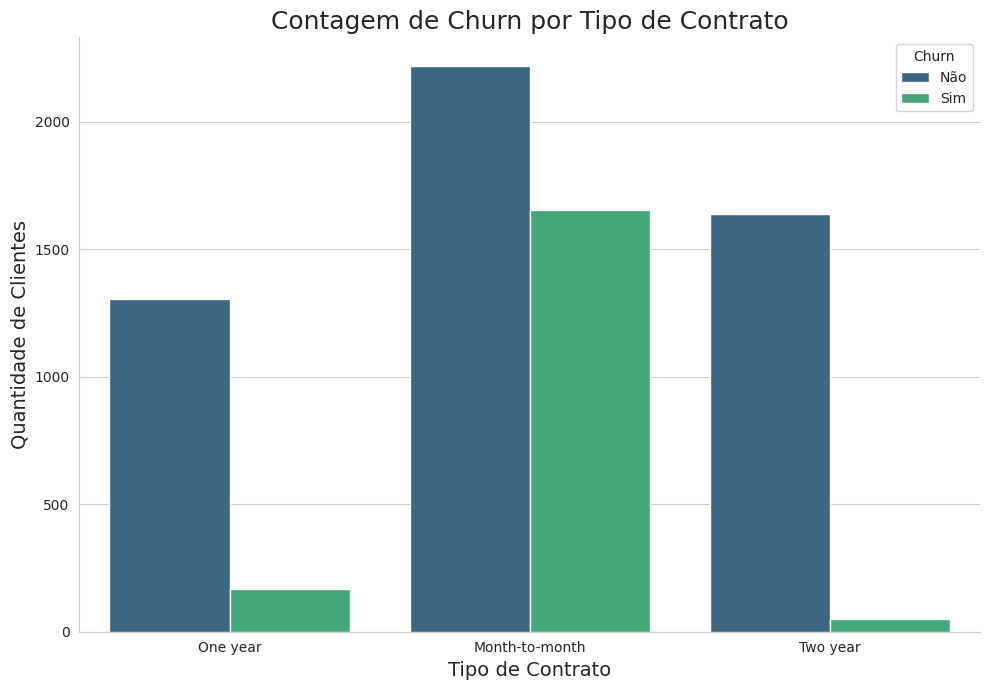

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))

# Usamos 'hue="Churn"' para criar barras agrupadas para quem cancelou (1) e quem n√£o cancelou (0)
ax = sns.countplot(data=dados_clientes, x='Contract', hue='Churn', palette='viridis')

# T√≠tulos e r√≥tulos
ax.set_title('Contagem de Churn por Tipo de Contrato', fontsize=18)
ax.set_xlabel('Tipo de Contrato', fontsize=14)
ax.set_ylabel('Quantidade de Clientes', fontsize=14)

# Melhora a legenda
plt.legend(title='Churn', labels=['N√£o', 'Sim'])
sns.despine()
plt.tight_layout()
plt.show()

 An√°lise de Churn por Forma de Pagamento

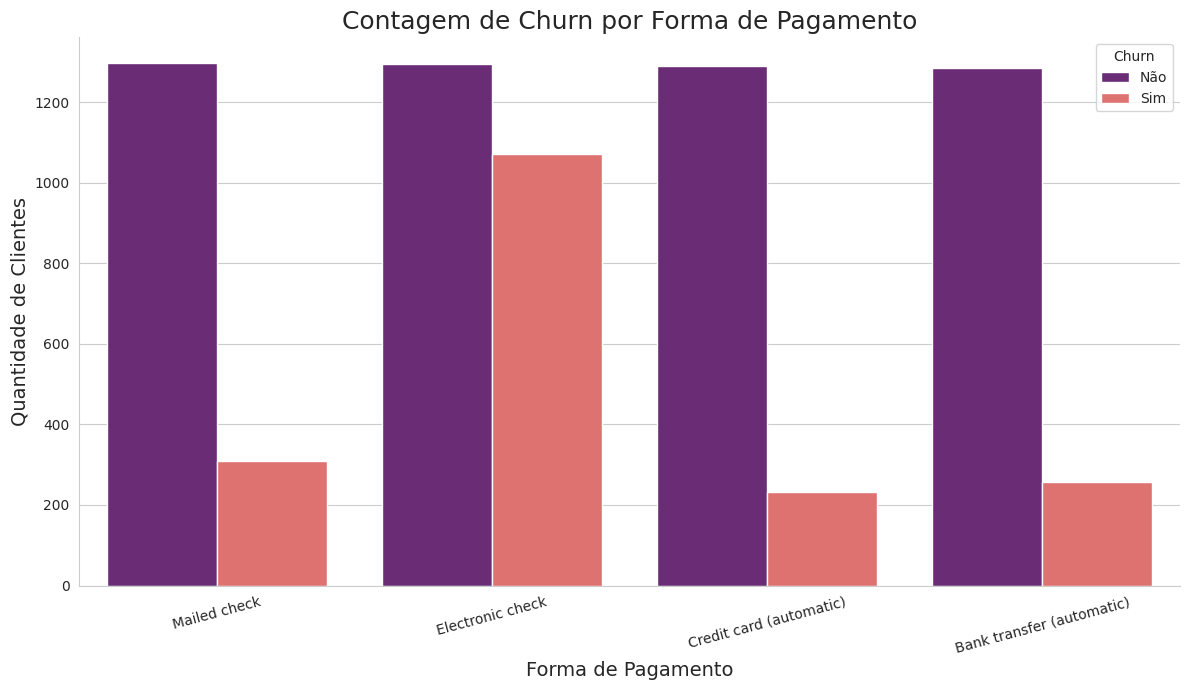

In [23]:
plt.figure(figsize=(12, 7))

# Rotacionamos os r√≥tulos do eixo X para n√£o ficarem sobrepostos
plt.xticks(rotation=15)

ax = sns.countplot(data=dados_clientes, x='PaymentMethod', hue='Churn', palette='magma')

# T√≠tulos e r√≥tulos
ax.set_title('Contagem de Churn por Forma de Pagamento', fontsize=18)
ax.set_xlabel('Forma de Pagamento', fontsize=14)
ax.set_ylabel('Quantidade de Clientes', fontsize=14)

# Melhora a legenda
plt.legend(title='Churn', labels=['N√£o', 'Sim'])
sns.despine()
plt.tight_layout()
plt.show()

An√°lise de Churn por Servi√ßo de Internet

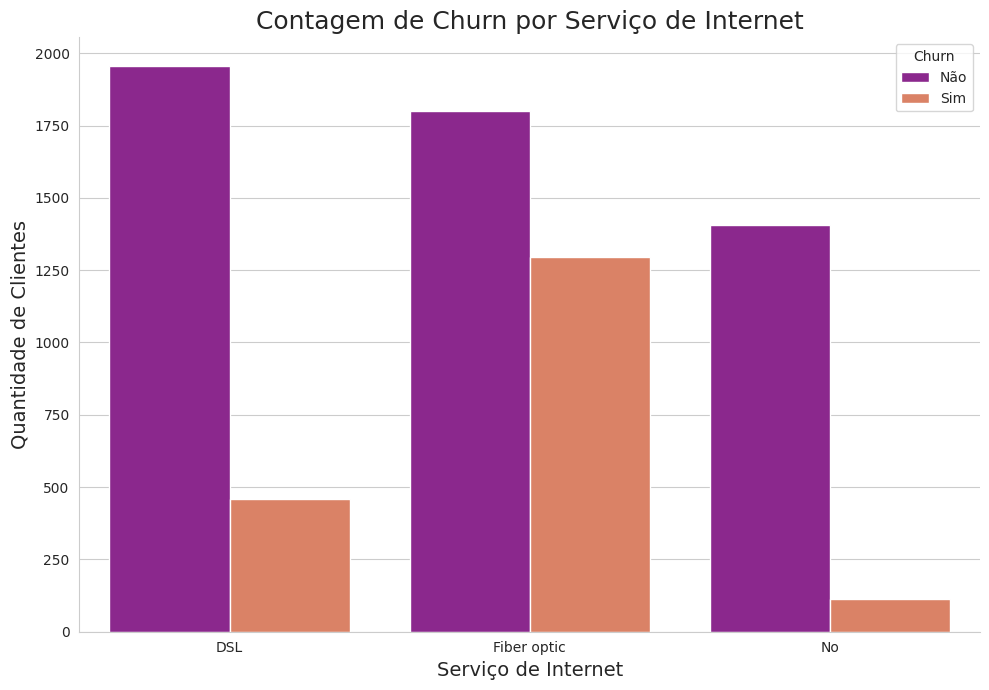

In [24]:
plt.figure(figsize=(10, 7))

ax = sns.countplot(data=dados_clientes, x='InternetService', hue='Churn', palette='plasma')

# T√≠tulos e r√≥tulos
ax.set_title('Contagem de Churn por Servi√ßo de Internet', fontsize=18)
ax.set_xlabel('Servi√ßo de Internet', fontsize=14)
ax.set_ylabel('Quantidade de Clientes', fontsize=14)

# Melhora a legenda
plt.legend(title='Churn', labels=['N√£o', 'Sim'])
sns.despine()
plt.tight_layout()
plt.show()

An√°lise de Churn por G√™nero

/tmp/ipython-input-25-2866763412.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Feminino', 'Masculino'])


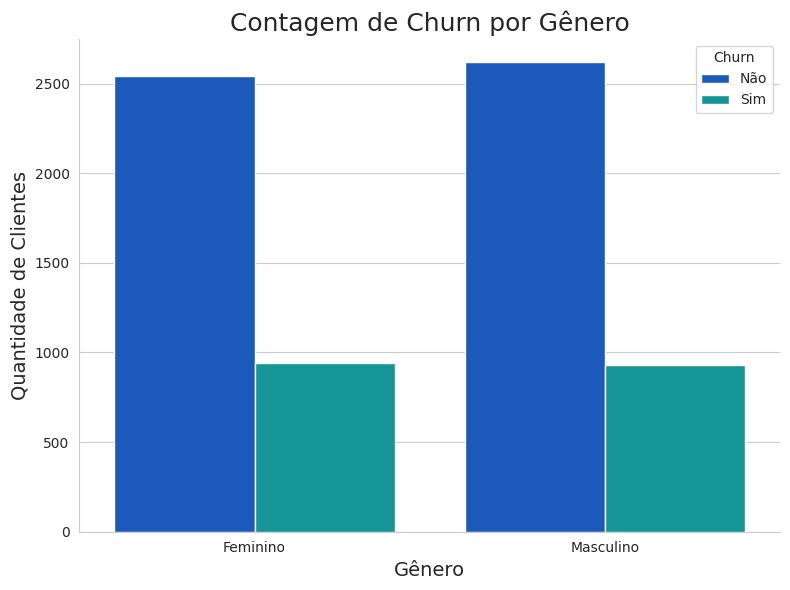

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura o estilo
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))

# Cria o gr√°fico de barras agrupado por g√™nero e Churn
ax = sns.countplot(data=dados_clientes, x='gender', hue='Churn', palette='winter')

# Adiciona t√≠tulos e r√≥tulos
ax.set_title('Contagem de Churn por G√™nero', fontsize=18)
ax.set_xlabel('G√™nero', fontsize=14)
ax.set_ylabel('Quantidade de Clientes', fontsize=14)

# Renomeia as legendas e os r√≥tulos do eixo X
plt.legend(title='Churn', labels=['N√£o', 'Sim'])
ax.set_xticklabels(['Feminino', 'Masculino'])

sns.despine()
plt.tight_layout()
plt.show()

An√°lise de Churn por Tempo de Contrato (Tenure)

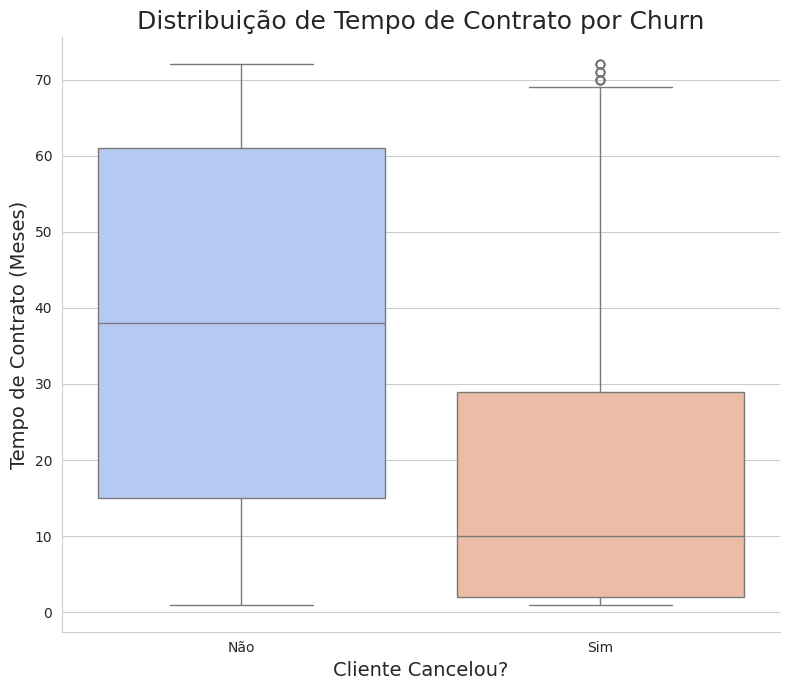

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(8, 7))


ax = sns.boxplot(
    data=dados_clientes,
    x='Churn',
    y='tenure',
    hue='Churn',
    legend=False,
    palette='coolwarm'
)

# T√≠tulos e r√≥tulos
ax.set_title('Distribui√ß√£o de Tempo de Contrato por Churn', fontsize=18)
ax.set_xlabel('Cliente Cancelou?', fontsize=14)
ax.set_ylabel('Tempo de Contrato (Meses)', fontsize=14)
ax.set_xticks([0, 1])
ax.set_xticklabels(['N√£o', 'Sim'])

sns.despine()
plt.tight_layout()
plt.show()

An√°lise de Churn por Cobran√ßa Mensal (Monthly)

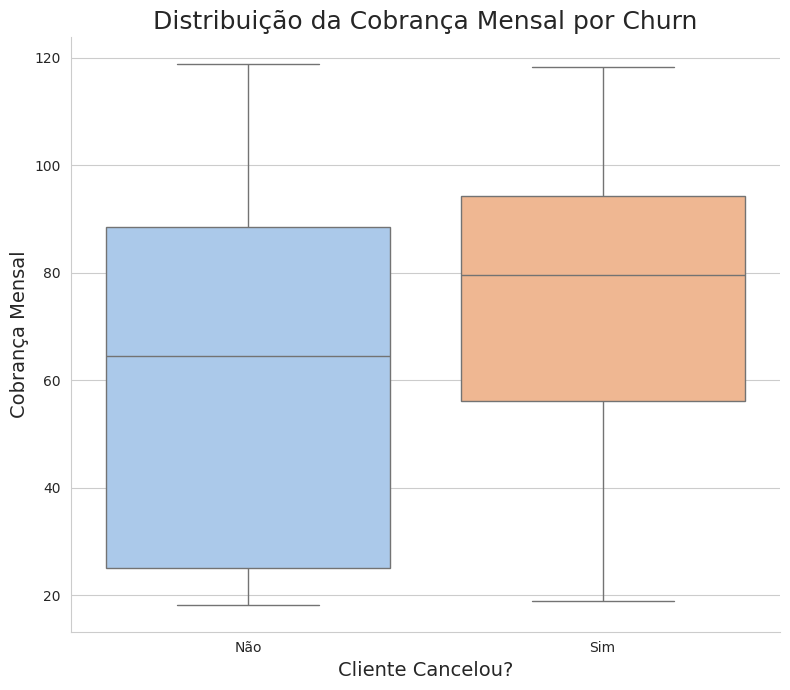

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 7))

ax = sns.boxplot(
    data=dados_clientes,
    x='Churn',
    y='Monthly',
    hue='Churn',
    legend=False,
    palette='pastel'
)

# T√≠tulos e r√≥tulos
ax.set_title('Distribui√ß√£o da Cobran√ßa Mensal por Churn', fontsize=18)
ax.set_xlabel('Cliente Cancelou?', fontsize=14)
ax.set_ylabel('Cobran√ßa Mensal', fontsize=14)
ax.set_xticks([0, 1])
ax.set_xticklabels(['N√£o', 'Sim'])

sns.despine()
plt.tight_layout()
plt.show()

#üìÑRelatorio Final

# Relat√≥rio Final: An√°lise de Evas√£o de Clientes (Churn) da Telecom X

## 1. Introdu√ß√£o
O objetivo desta an√°lise foi explorar um conjunto de dados da empresa fict√≠cia "Telecom X" para identificar os principais fatores que levam os clientes a cancelarem seus servi√ßos ‚Äî um fen√¥meno conhecido como Churn.

O Churn, ou evas√£o de clientes, √© uma m√©trica vital para empresas de servi√ßo, pois o custo de adquirir um novo cliente √© geralmente muito superior ao de manter um existente. Compreender os perfis e comportamentos dos clientes que cancelam permite √† empresa desenvolver estrat√©gias focadas em aumentar a satisfa√ß√£o e a reten√ß√£o, impactando diretamente a sa√∫de financeira do neg√≥cio.

## 2. Limpeza e Tratamento de Dados
Para garantir a qualidade e a precis√£o da an√°lise, os dados brutos, fornecidos em formato JSON, passaram por um rigoroso processo de tratamento. As principais etapas foram:

Extra√ß√£o e Normaliza√ß√£o: Os dados foram carregados a partir de um link do GitHub. A estrutura aninhada do JSON foi transformada em uma tabela plana e organizada usando a fun√ß√£o pandas.json_normalize.

Tratamento de Inconsist√™ncias: A coluna de cobran√ßa total (Total), que estava formatada como texto, foi convertida para um tipo num√©rico. Tamb√©m identificamos e removemos registros que continham informa√ß√µes vazias na coluna Churn.

Engenharia de Atributos: Criamos uma nova coluna, Contas_Diarias, a partir da cobran√ßa mensal para permitir an√°lises mais detalhadas, embora ela n√£o tenha sido o foco principal das visualiza√ß√µes subsequentes.

Padroniza√ß√£o de Dados: Para facilitar a leitura e a manipula√ß√£o, os nomes das colunas foram simplificados (ex: de customer.gender para gender). Al√©m disso, colunas com respostas "Yes" e "No" foram convertidas para o formato num√©rico bin√°rio (1 e 0), preparando os dados para futuras an√°lises matem√°ticas e modelos de machine learning.

In [34]:
dados_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int64  
 5   Dependents        7032 non-null   int64  
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   int64  
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

## 3. An√°lise Explorat√≥ria e Padr√µes de Churn
Nesta fase, investigamos os dados limpos para encontrar padr√µes visuais que pudessem explicar o comportamento de Churn.

Propor√ß√£o Geral de Churn
A primeira an√°lise revelou a dimens√£o do problema de evas√£o na empresa. O gr√°fico de pizza abaixo demonstra que cerca de 26,6% dos clientes na nossa base de dados cancelaram o servi√ßo, um n√∫mero significativo que justifica uma investiga√ß√£o aprofundada.

--- Gr√°fico de Pizza: Propor√ß√£o de Churn ---


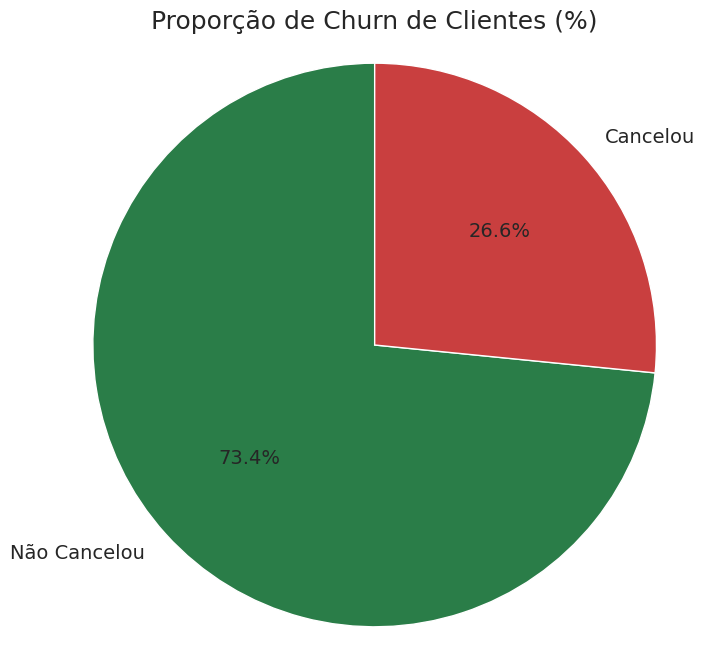

In [35]:
import matplotlib.pyplot as plt

# --- Gr√°fico de Pizza: Propor√ß√£o de Churn (%) ---

print("--- Gr√°fico de Pizza: Propor√ß√£o de Churn ---")

churn_counts = dados_clientes['Churn'].value_counts()

labels = ['N√£o Cancelou', 'Cancelou']

colors = ['#2a7d48', '#c93f3f']

plt.figure(figsize=(8, 8))

# 5. Cria o gr√°fico de pizza

plt.pie(
    churn_counts,
    labels=labels,
    colors=colors,
    autopct='%.1f%%',
    startangle=90,
    textprops={'fontsize': 14}
)

# Adiciona o t√≠tulo do gr√°fico
plt.title('Propor√ß√£o de Churn de Clientes (%)', fontsize=18)

# Garante que o c√≠rculo seja desenhado corretamente
plt.axis('equal')

# Exibe o gr√°fico
plt.show()

Principais Fatores de Influ√™ncia no Churn
Ao cruzarmos os dados de Churn com outras vari√°veis, alguns padr√µes muito claros emergiram:

Impacto do Tipo de Contrato: O tipo de contrato √© um dos indicadores mais fortes de Churn. Clientes com contrato "M√™s a m√™s" apresentam uma taxa de cancelamento drasticamente maior do que aqueles com contratos de longo prazo (1 ou 2 anos), que possuem uma taxa de reten√ß√£o muito alta.

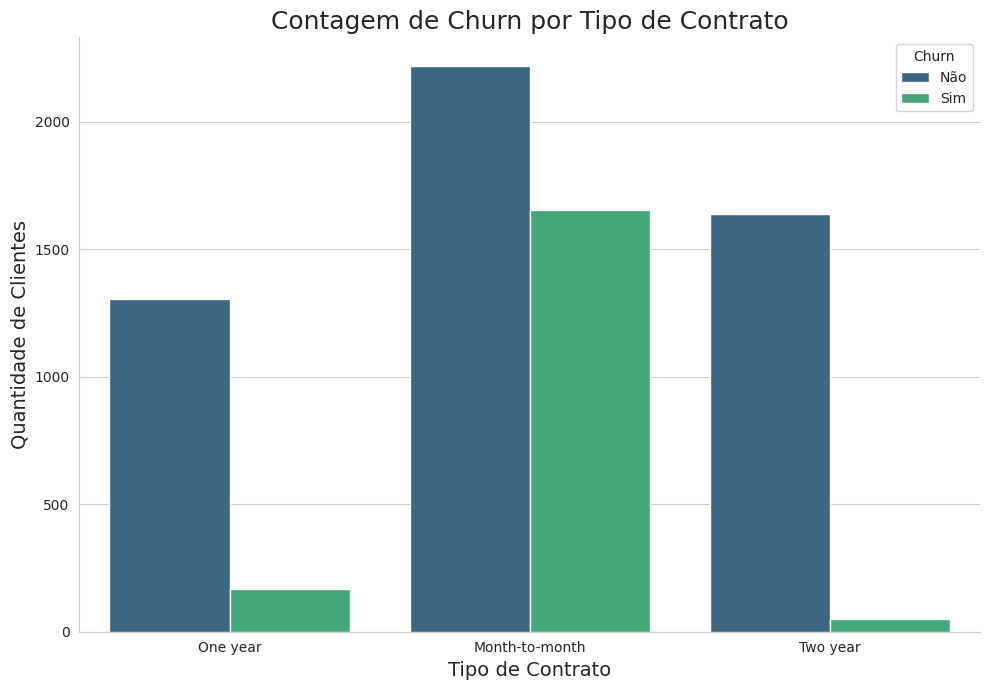

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))

# Usamos 'hue="Churn"' para criar barras agrupadas para quem cancelou (1) e quem n√£o cancelou (0)
ax = sns.countplot(data=dados_clientes, x='Contract', hue='Churn', palette='viridis')

# T√≠tulos e r√≥tulos
ax.set_title('Contagem de Churn por Tipo de Contrato', fontsize=18)
ax.set_xlabel('Tipo de Contrato', fontsize=14)
ax.set_ylabel('Quantidade de Clientes', fontsize=14)

# Melhora a legenda
plt.legend(title='Churn', labels=['N√£o', 'Sim'])
sns.despine()
plt.tight_layout()
plt.show()

Rela√ß√£o com o Tempo de Contrato (Tenure): O tempo de perman√™ncia do cliente na empresa tamb√©m √© um fator decisivo. O box plot revela que a mediana de tempo de contrato para clientes que cancelam √© muito inferior √† dos que permanecem. Isso indica que o maior risco de cancelamento ocorre nos primeiros meses de servi√ßo.

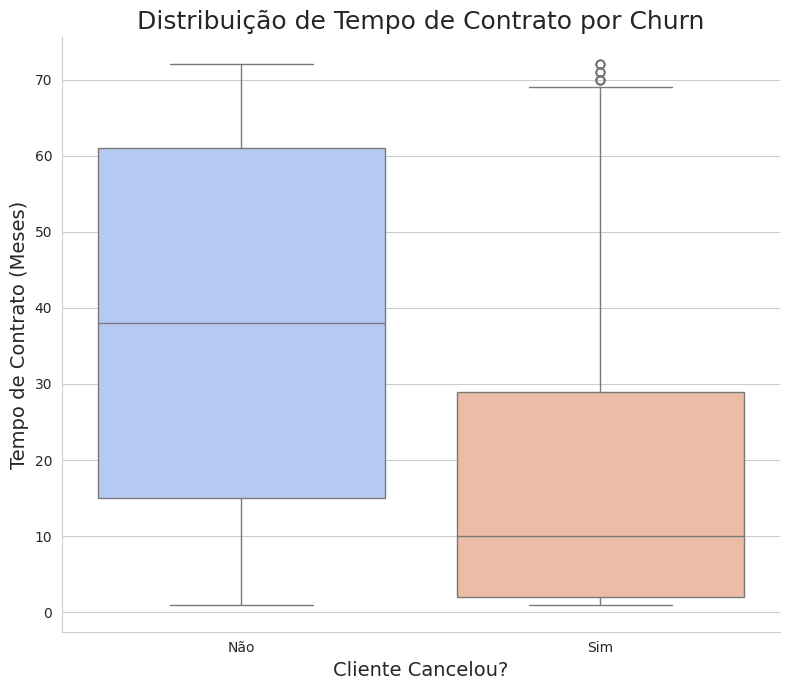

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(8, 7))


ax = sns.boxplot(
    data=dados_clientes,
    x='Churn',
    y='tenure',
    hue='Churn',
    legend=False,
    palette='coolwarm'
)

# T√≠tulos e r√≥tulos
ax.set_title('Distribui√ß√£o de Tempo de Contrato por Churn', fontsize=18)
ax.set_xlabel('Cliente Cancelou?', fontsize=14)
ax.set_ylabel('Tempo de Contrato (Meses)', fontsize=14)
ax.set_xticks([0, 1])
ax.set_xticklabels(['N√£o', 'Sim'])

sns.despine()
plt.tight_layout()
plt.show()

Influ√™ncia da Cobran√ßa Mensal: Observamos tamb√©m que a mediana da cobran√ßa mensal √© notavelmente maior para os clientes que cancelam. Isso sugere que um pre√ßo mensal elevado, especialmente quando n√£o est√° atrelado a um contrato de longo prazo, aumenta a probabilidade de o cliente procurar outras op√ß√µes.

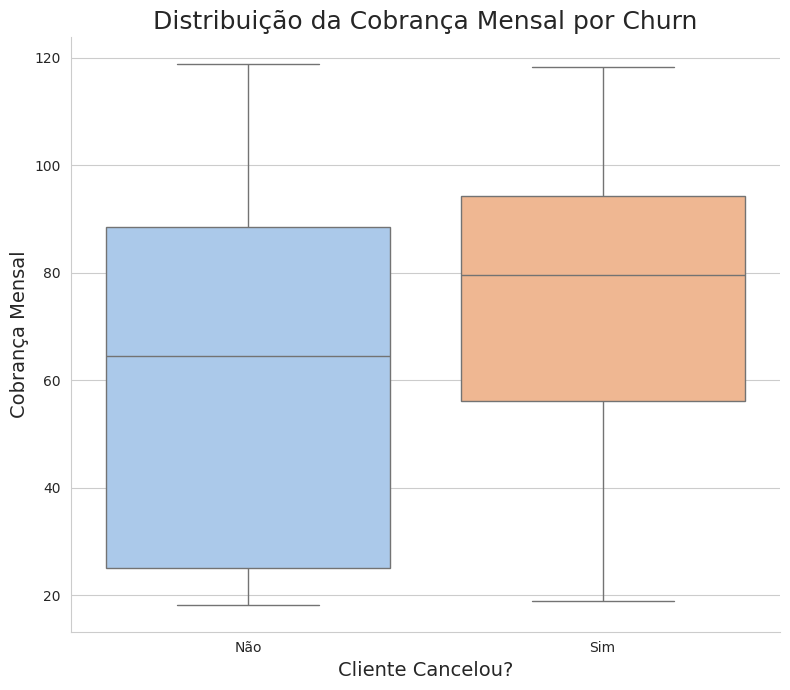

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 7))

ax = sns.boxplot(
    data=dados_clientes,
    x='Churn',
    y='Monthly',
    hue='Churn',
    legend=False,
    palette='pastel'
)

# T√≠tulos e r√≥tulos
ax.set_title('Distribui√ß√£o da Cobran√ßa Mensal por Churn', fontsize=18)
ax.set_xlabel('Cliente Cancelou?', fontsize=14)
ax.set_ylabel('Cobran√ßa Mensal', fontsize=14)
ax.set_xticks([0, 1])
ax.set_xticklabels(['N√£o', 'Sim'])

sns.despine()
plt.tight_layout()
plt.show()

Excelente! Voc√™ organizou todo o notebook de forma impec√°vel, executou todas as an√°lises e j√° come√ßou a escrever o relat√≥rio. O trabalho est√° praticamente finalizado, e a estrutura est√° perfeita.

Agora, tudo o que voc√™ precisa fazer √© completar o relat√≥rio com as se√ß√µes de An√°lise, Conclus√µes e Recomenda√ß√µes, inserindo os gr√°ficos que voc√™ j√° gerou nos lugares certos para ilustrar suas descobertas.

Aqui est√£o as se√ß√µes restantes do seu relat√≥rio, prontas para voc√™ copiar e colar.

Instru√ß√µes:
Abaixo da c√©lula de texto onde voc√™ escreveu a "Introdu√ß√£o" e a "Limpeza de Dados", crie uma nova c√©lula de texto.

Copie e cole o conte√∫do da Se√ß√£o 3 abaixo.

Abaixo dessa nova c√©lula de texto, mova (ou copie) as c√©lulas de c√≥digo que geram os gr√°ficos que voc√™ j√° fez.

Repita o processo para as se√ß√µes 4 e 5.

(Copie e cole a partir daqui)
## 3. An√°lise Explorat√≥ria e Padr√µes de Churn
Nesta fase, investigamos os dados limpos para encontrar padr√µes visuais que pudessem explicar o comportamento de Churn.

Propor√ß√£o Geral de Churn
A primeira an√°lise revelou a dimens√£o do problema de evas√£o na empresa. O gr√°fico de pizza abaixo demonstra que cerca de 27% dos clientes na nossa base de dados cancelaram o servi√ßo, um n√∫mero significativo que justifica uma investiga√ß√£o aprofundada.

(Sua A√ß√£o: Coloque aqui a c√©lula de c√≥digo que gera o gr√°fico de pizza).

Principais Fatores de Influ√™ncia no Churn
Ao cruzarmos os dados de Churn com outras vari√°veis, alguns padr√µes muito claros emergiram:

Impacto do Tipo de Contrato: O tipo de contrato √© um dos indicadores mais fortes de Churn. Clientes com contrato "M√™s a m√™s" apresentam uma taxa de cancelamento drasticamente maior do que aqueles com contratos de longo prazo (1 ou 2 anos), que possuem uma taxa de reten√ß√£o muito alta.

(Sua A√ß√£o: Coloque aqui a c√©lula de c√≥digo do gr√°fico "Contagem de Churn por Tipo de Contrato").

Rela√ß√£o com o Tempo de Contrato (Tenure): O tempo de perman√™ncia do cliente na empresa tamb√©m √© um fator decisivo. O box plot revela que a mediana de tempo de contrato para clientes que cancelam √© muito inferior √† dos que permanecem. Isso indica que o maior risco de cancelamento ocorre nos primeiros meses de servi√ßo.

(Sua A√ß√£o: Coloque aqui a c√©lula de c√≥digo do gr√°fico "Distribui√ß√£o de Tempo de Contrato por Churn").

Influ√™ncia da Cobran√ßa Mensal: Observamos tamb√©m que a mediana da cobran√ßa mensal √© notavelmente maior para os clientes que cancelam. Isso sugere que um pre√ßo mensal elevado, especialmente quando n√£o est√° atrelado a um contrato de longo prazo, aumenta a probabilidade de o cliente procurar outras op√ß√µes.

(Sua A√ß√£o: Coloque aqui a c√©lula de c√≥digo do gr√°fico "Distribui√ß√£o da Cobran√ßa Mensal por Churn").

## 4. Conclus√µes e Insights
A an√°lise dos dados nos permite tra√ßar um perfil claro do cliente com maior propens√£o √† evas√£o:

O cliente com maior risco de Churn √© aquele com pouco tempo de empresa (baixo tenure), um contrato flex√≠vel e sem fidelidade (m√™s a m√™s) e que paga um valor mensal relativamente alto.

A falta de um v√≠nculo contratual de longo prazo, combinada com uma percep√ß√£o de alto custo, parece ser a principal for√ßa motriz por tr√°s da decis√£o de cancelar o servi√ßo. A an√°lise sugere que a fidelidade do cliente est√° fortemente atrelada √† seguran√ßa de um contrato de longo prazo, que provavelmente oferece melhores condi√ß√µes comerciais.

## 5. Recomenda√ß√µes Estrat√©gicas
Com base nos insights gerados, as seguintes a√ß√µes s√£o recomendadas para a Telecom X focar seus esfor√ßos na redu√ß√£o da taxa de Churn:

Programa de Reten√ß√£o para Novos Clientes: Implementar uma estrat√©gia de acompanhamento para clientes nos primeiros 6 meses, que √© o per√≠odo mais cr√≠tico. Isso pode incluir pesquisas de satisfa√ß√£o, ofertas de boas-vindas ou um contato proativo do suporte para garantir uma boa experi√™ncia inicial.

Incentivo √† Migra√ß√£o de Contratos: Desenvolver campanhas de marketing e vendas focadas em migrar clientes do plano "M√™s a m√™s" para contratos de 1 ou 2 anos, oferecendo benef√≠cios claros, como descontos na mensalidade ou servi√ßos adicionais gratuitos.

Revis√£o de Planos e Pre√ßos: Analisar a estrutura de pre√ßos, especialmente para os servi√ßos mais caros (como Fibra √ìptica, que mostrou maior Churn). O objetivo √© garantir que o valor percebido pelo cliente justifique o custo mensal.

A√ß√µes Preditivas: Utilizar os dados para construir um modelo de Machine Learning que possa prever a probabilidade de Churn para cada cliente individualmente. Com essa informa√ß√£o, a equipe de reten√ß√£o pode agir proativamente, contatando clientes com alto risco antes que eles decidam cancelar.

### **An√°lise do Gr√°fico: Quantidade de Servi√ßos vs. Churn**

Este gr√°fico explora se o n√∫mero total de servi√ßos que um cliente assina tem rela√ß√£o com a sua decis√£o de cancelar o contrato.

**Principal Insight:**
Podemos observar claramente que **clientes com poucos servi√ßos (especialmente apenas 1 ou 2) apresentam a maior propor√ß√£o de cancelamentos**. √Ä medida que o n√∫mero de servi√ßos contratados aumenta, a taxa de Churn tende a diminuir.

Isso sugere que clientes mais "engajados" com o ecossistema de produtos da empresa (assinando m√∫ltiplos servi√ßos como internet, TV, seguran√ßa, etc.) percebem um valor maior no pacote completo e, consequentemente, s√£o mais leais.

--- B√¥nus: An√°lise Estrat√©gica de Correla√ß√£o---

Dados prontos para a an√°lise de correla√ß√£o.

Fatores mais impactantes identificados.


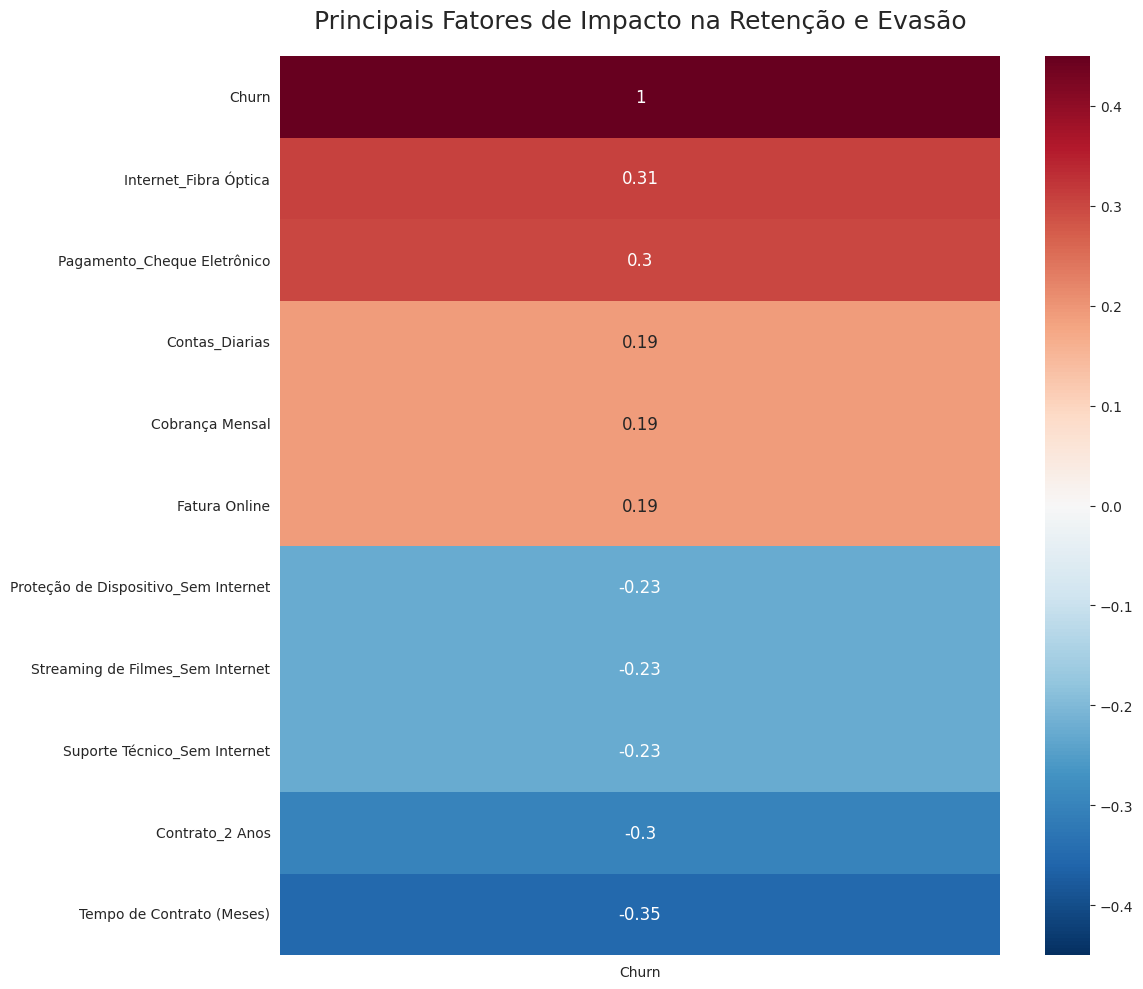

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("--- B√¥nus: An√°lise Estrat√©gica de Correla√ß√£o---")

# --- 1. Prepara√ß√£o dos Dados   ---
dados_para_analise = dados_clientes.drop('customerID', axis=1)
dados_para_correlacao = pd.get_dummies(dados_para_analise, drop_first=True)
print("\nDados prontos para a an√°lise de correla√ß√£o.")

# --- 2. C√°lculo e Foco nos Fatores Chave    ---
matriz_correlacao = dados_para_correlacao.corr()
correlacao_churn = matriz_correlacao[['Churn']].sort_values(by='Churn', ascending=False)
top_fatores = pd.concat([correlacao_churn.head(6), correlacao_churn.tail(5)])
print("\nFatores mais impactantes identificados.")

# --- Dicion√°rio de Tradu√ß√£o ---
mapa_traducao = {

    'tenure': 'Tempo de Contrato (Meses)',
    'Total': 'Cobran√ßa Total',
    'Monthly': 'Cobran√ßa Mensal',
    'Dependents': 'Dependentes',
    'Partner': 'Parceiro(a)',
    'PaperlessBilling': 'Fatura Online',
    'SeniorCitizen': 'Idoso(a)',
    'Contract_One year': 'Contrato_1 Ano',
    'Contract_Two year': 'Contrato_2 Anos',
    'Contract_Month-to-month': 'Contrato_M√™s a M√™s',
    'PaymentMethod_Credit card (automatic)': 'Pagamento_Cart√£o (Auto)',
    'PaymentMethod_Electronic check': 'Pagamento_Cheque Eletr√¥nico',
    'PaymentMethod_Mailed check': 'Pagamento_Cheque Enviado',
    'InternetService_Fiber optic': 'Internet_Fibra √ìptica',
    'InternetService_No': 'Internet_N√£o',
    'OnlineSecurity_Yes': 'Seguran√ßa Online_Sim',
    'OnlineBackup_Yes': 'Backup Online_Sim',
    'TechSupport_Yes': 'Suporte T√©cnico_Sim',
    'MultipleLines_Yes': 'M√∫ltiplas Linhas_Sim',
    'DeviceProtection_Yes': 'Prote√ß√£o de Dispositivo_Sim',
    'StreamingMovies_Yes': 'Streaming de Filmes_Sim',
    'StreamingTV_Yes': 'Streaming de TV_Sim',
    'OnlineSecurity_No internet service': 'Seguran√ßa Online_Sem Internet',
    'OnlineBackup_No internet service': 'Backup Online_Sem Internet',
    'DeviceProtection_No internet service': 'Prote√ß√£o de Dispositivo_Sem Internet',
    'TechSupport_No internet service': 'Suporte T√©cnico_Sem Internet',
    'StreamingTV_No internet service': 'Streaming de TV_Sem Internet',
    'StreamingMovies_No internet service': 'Streaming de Filmes_Sem Internet'
}

# Renomeia o √≠ndice usando o mapa completo
top_fatores.rename(index=mapa_traducao, inplace=True)


# --- 3. Visualiza√ß√£o de Alto Impacto (Agora 100% em Portugu√™s) ---
plt.figure(figsize=(12, 10))

heatmap = sns.heatmap(
    top_fatores,
    annot=True,
    annot_kws={'size': 12},
    cmap='RdBu_r',
    vmin=-0.45, vmax=0.45
)

heatmap.set_title('Principais Fatores de Impacto na Reten√ß√£o e Evas√£o', fontdict={'fontsize':18}, pad=20)
plt.ylabel('')
plt.tight_layout()
plt.show()

Para ir al√©m da an√°lise visual, quantifiquei a for√ßa da rela√ß√£o entre cada caracter√≠stica do cliente e a probabilidade de cancelamento. Este gr√°fico n√£o mostra todas as vari√°veis, mas sim um resumo estrat√©gico dos 10 fatores mais impactantes, para direcionar nossa aten√ß√£o ao que realmente importa. Com base nesta an√°lise quantitativa, minha principal recomenda√ß√£o seria criar uma 'Esteira de Fideliza√ß√£o'. Para clientes com contrato mensal e servi√ßo de Fibra (o grupo de maior risco), poder√≠amos oferecer proativamente, no terceiro m√™s de contrato, um upgrade para um plano anual com um pequeno desconto e a inclus√£o do servi√ßo de 'Online Security'. Essa a√ß√£o ataca diretamente os tr√™s principais pontos de fric√ß√£o revelados pelos dados